# Business Problem




In [ ]:
#import libraries
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt

# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Student_marks_information_final1.csv"
df = pd.read_csv(path)

In [ ]:
df.describe()

,study_hours,student_marks
count,19.000000,20.000000
mean,7.465789,79.964000
std,1.111032,4.379535
min,5.190000,70.660000
25%,6.635000,77.612500
50%,7.550000,80.130000
75%,8.455000,83.595000
max,8.990000,86.750000


In [ ]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [ ]:
df.tail()

,study_hours,student_marks
15,7.53,81.67
16,8.56,84.68
17,8.94,86.75
18,6.60,78.05
19,8.35,83.50


In [ ]:
df.shape

(20, 2)

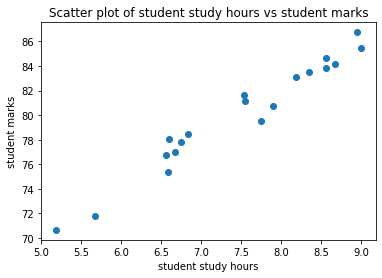

In [ ]:
plt.scatter(x = df.study_hours , y = df.student_marks)
plt.xlabel("student study hours")
plt.ylabel("student marks")
plt.title("Scatter plot of student study hours vs student marks")
plt.show()

## Prepare the data for machine learning algorithms

# Data cleaning

In [ ]:
df.isnull().sum()

study_hours      1
student_marks    0
dtype: int64

In [ ]:
df.mean()

study_hours       7.465789
student_marks    79.964000
dtype: float64

In [ ]:
df2 = df.fillna(df.mean())

In [ ]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [ ]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,7.465789,78.68
3,5.670000,71.82
4,8.670000,84.19


In [ ]:
#split dataset

In [ ]:
X = df2.drop("student_marks", axis = "columns")
y = df2.drop("study_hours", axis = "columns")
print("Shape of X = ", X.shape)
print("Shape of y = ", y.shape)

Shape of X =  (20, 1)
Shape of y =  (20, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 5) 
print("Shape of X_train = ", X_train.shape)
print("Shape of X_test =", X_test.shape)
print("Shape of y_train = ", y_train.shape)
print("Shape of y_test =", y_test.shape)

Shape of X_train =  (16, 1)
Shape of X_test = (4, 1)
Shape of y_train =  (16, 1)
Shape of y_test = (4, 1)


## Select a model and train it

In [ ]:
# our skatter graph gives us a straight line which means we should use a machine learning algorithm called linear regression
# y = m * x + c ( formula for a straight line as well as linear regression)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.coef_


array([[3.87406067]])

In [ ]:
lr.intercept_

array([50.99163507])

In [ ]:
m = 3.87
c = 50.99
y = m * 4 + c 
y

66.47

In [ ]:
lr.predict([[4]])[0][0].round(2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


66.49

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([[79.91455643],
       [80.24079312],
       [85.62573745],
       [83.34004166]])

In [ ]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["study_hours","student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,7.465789,78.68,79.914556
1,7.550000,81.18,80.240793
2,8.940000,86.75,85.625737
3,8.350000,83.50,83.340042


## Fine-Tune your model

In [ ]:
lr.score(X_test , y_test)

0.8955822064235894

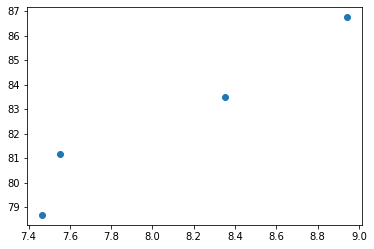

In [ ]:
plt.scatter(X_test, y_test)

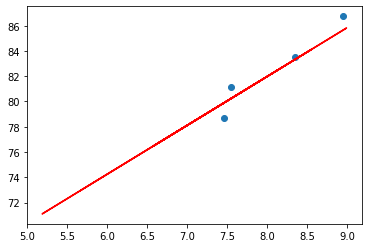

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color = "r")

# Present your solution

## Save ML Model

In [ ]:
import joblib
joblib.dump(lr, "Student_mark_predictor_model.pkl")

['Student_mark_predictor_model.pkl']

In [ ]:
model = joblib.load("Student_mark_predictor_model.pkl")

In [ ]:
model.predict([[5]])[0][0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


70.36193841593604

## Launch, Monitor and maintain your system